In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('/content/Obesity.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [4]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Frequency distribution for {col}:")
    print(df[col].value_counts())
    print("\n")

Frequency distribution for Gender:
Gender
Male      1061
Female    1041
Name: count, dtype: int64


Frequency distribution for family_history_with_overweight:
family_history_with_overweight
yes    1722
no      383
Name: count, dtype: int64


Frequency distribution for FAVC:
FAVC
yes    1866
no      245
Name: count, dtype: int64


Frequency distribution for CAEC:
CAEC
Sometimes     1758
Frequently     241
Always          53
no              50
Name: count, dtype: int64


Frequency distribution for SMOKE:
SMOKE
no     2067
yes      44
Name: count, dtype: int64


Frequency distribution for SCC:
SCC
no     2008
yes      96
Name: count, dtype: int64


Frequency distribution for CALC:
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64


Frequency distribution for MTRANS:
MTRANS
Public_Transportation    1576
Automobile                455
Walking                    55
Motorbike                  11
Bike                        7
Name: count,

In [6]:
print(df.isnull().sum())

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64


**Data Preprocessing**

In [9]:

numeric_df = df.select_dtypes(include=['number'])
df.fillna(numeric_df.median(), inplace=True)


df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


**Encoding Categorical Variables**

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


**Feature Scaling**

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


**Feature Selection**

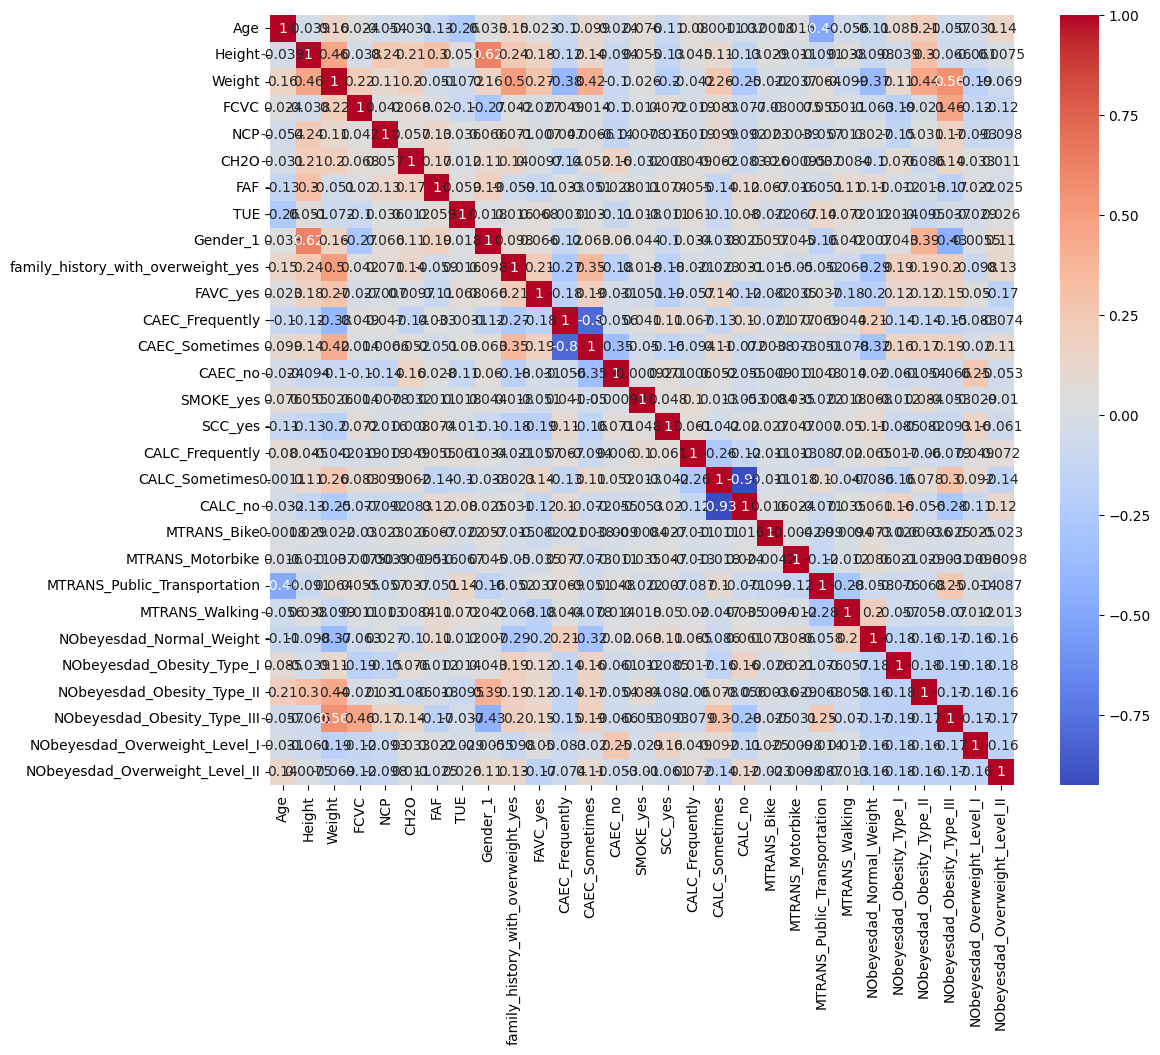

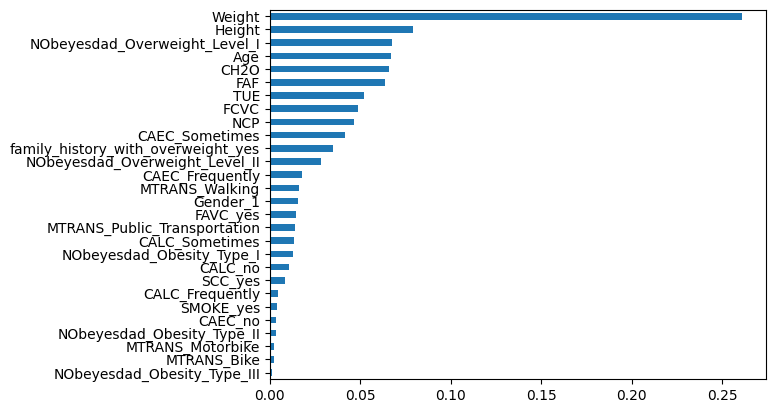

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

from sklearn.ensemble import RandomForestClassifier

X = df.drop('NObeyesdad_Normal_Weight', axis=1)
y = df['NObeyesdad_Normal_Weight']
model = RandomForestClassifier()
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.show()

In [18]:
df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_1', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'],
      dtype='object')

 **Model Development**

**Split Data**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Model Selection and Training**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report



**Logistic Regression**

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.919558359621451
              precision    recall  f1-score   support

       False       0.92      0.99      0.95       541
        True       0.89      0.52      0.65        93

    accuracy                           0.92       634
   macro avg       0.91      0.75      0.80       634
weighted avg       0.92      0.92      0.91       634



**RandomForest**

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9668769716088328
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       541
        True       0.91      0.86      0.88        93

    accuracy                           0.97       634
   macro avg       0.94      0.92      0.93       634
weighted avg       0.97      0.97      0.97       634



**SVM**

In [32]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9384858044164038
              precision    recall  f1-score   support

       False       0.94      0.99      0.97       541
        True       0.95      0.61      0.75        93

    accuracy                           0.94       634
   macro avg       0.94      0.80      0.86       634
weighted avg       0.94      0.94      0.93       634



**Hyperparameter Tuning**

In [33]:
from sklearn.model_selection import GridSearchCV

# Example with Grid Search for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best accuracy found:", grid_search.best_score_)


Best parameters found: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy found: 0.9796907924874028


**Interpretation and Insights**

**Feature Importance Interpretation**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 15.8 MB/s eta 0:00:00


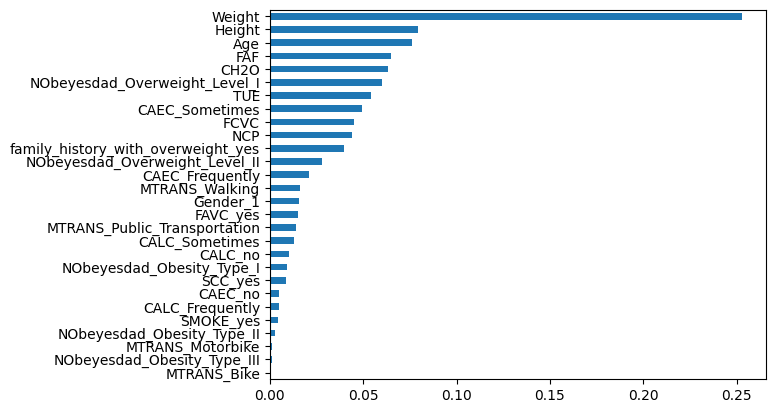

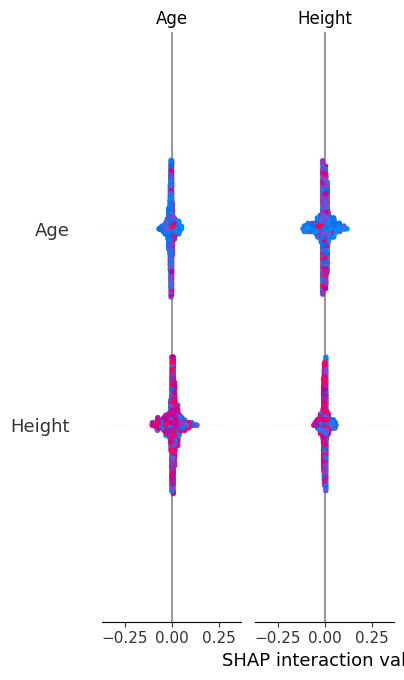

In [25]:
!pip install shap
import shap
importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.show()
explainer = shap.TreeExplainer(grid_search.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

**Deployment and Monitoring**

pickel file

In [36]:
import pickle
joblib.dump(grid_search.best_estimator_, 'best_model.pkl')
model = joblib.load('best_model.pkl')


Reporting and Communication

In [37]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Obesity Dataset Report")
profile.to_file("obesity_report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]